<img src="http://www.ociv.usm.cl/imag/logos/UTFSM_logo.gif" style="float:right;height:100px">
<img src="https://www.inf.utfsm.cl/images/sitio/di.png" style="float:left;height:100px">
<center>
    <h1> INF393 Máquinas de Aprendizaje</h1>
    <h1> Tarea N°1: Métodos Lineales para Regresión </h1>
</center>
<br>
<center>13 de Octubre de 2017</center>


<table border="0" style="width:500px">
<tr> 
<td style="text-align:center">**Javier Levio S.**</td><td style="text-align:center">**Carlos Molina Y.**</td>
</tr>
<tr>
<td style="text-align:center">201273598-k</td><td style="text-align:center">201273507-6</td>
</tr>
<tr>
<td style="text-align:center">`javier.levio.12@sansano.usm.cl`</td><td style="text-align:center">`carlos.molina.12@sansano.usm.cl`</td>
</tr>
</table>

## Introducción


## 1.  Regresión Lineal Ordinaria

Se pretende utilizar una regresión lineal, para predecir el precio de una vivienda dado ciertos atributos. Para trabajar con la regresión lineal se utilizarán las siguientes librerías:

In [1]:
# Para manipular data sets
import pandas as pd
# Principalmente para manipular matrices
import numpy as np
# Para escalar los datos
from sklearn.preprocessing import StandardScaler
# Para utilizar la regresión lineal estándar
import sklearn.linear_model as lm
# Para graficar
import pylab 
# Para graficar
import scipy.stats as stats
# Para realizar validación cruzada
from sklearn.model_selection import KFold
# Para aplicar regularización con el método de Ridge
from sklearn.linear_model import Ridge
# Para gráficar
import matplotlib.pylab as plt
# Para aplicar regularización el método de Lasso
from sklearn.linear_model import Lasso

Se procede a leer los datos del *dataset* a utilizar, teniendo el cuidado de no considerar información irrelevante para el cálculo del precio de las viviendas, como lo son las columnas: *id*, *date*, *zipcode*.

In [2]:
df = pd.read_csv("kc_house_data.csv")
# se eliminan las columnas con información irrelevante para el analisis
df.drop(['id','date','zipcode'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


El *dataset* corresponde a 21613 viviendas (filas), donde cada una posee 18 atributos incluyendo el precio al que fueron vendidas.

In [3]:
df.shape

(21613, 18)

La naturaleza de los atributos incluídos en el dataset es en su mayoría números enteros (int64), siendo solo 4 de ellos de punto flotante (flat64).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


Algunas características particulares del *dataset* incluyen:
<ul>
<li>La casa más cara se vendió por 7,700,000 USD, mientras que la más barata por 75,000 USD</li> 
<li>La casa más vieja se construyó en el año 1900</li>
<li>En promedio las casas poseen 2 baños y 3 dormitorios</li>
</ul>

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


A continuación se centran y escalan los datos, restando la media de cada atributo y dividiendo por la correspondiente desviación estándar. Con este procedimiento se llevan los datos a una distribución normal estándar.

Además, se linealizan los precios de las casas mediante una transformación logarítmica. Esto para forzar la linealidad de los datos.

In [6]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

Con los datos ya *preprocesados* se aparta el precio del conjunto de atributos y se considera como la salida esperada de la regresión lineal. Además, se agrega una columna de $1$s en los atributos, que corresponderán al intercepto de la regresión. Luego, se procede a separar los primeros 15129 datos (70% del *dataset*), como el *set* de entrenamiento y el resto como el *set* de prueba. Finalmente, es necesario especificar `fit_intercept = False` ya que como se menciona en la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html "sklearn.linear_model.LinearRegression"), no es necesario calcular un intercepto si los datos están centrados.



In [7]:
X = df_scaled.iloc[:, 1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
p = X.shape[1]
y = df_scaled['price']
mascara = np.zeros(N)
Ntrain = int(N*0.7)
mascara[:Ntrain] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Para verificar acaso los atributos considerados para la regresión lineal son realmente relevantes para el cálculo, se realiza el cálculo de los z-score para cada uno de estos.

Considerando el z-score como:

$$z_j = \dfrac{\hat{\beta}_j}{\hat{\sigma}\sqrt{v_j}}$$

Donde $\sigma^2$ se calcula como el error cuadrático medio para todas las predicciones, y $v_j$ la diagonal de la matriz $(X^TX)^{-1}$ (inversa de la matriz de covarianza), donde $X$ en este caso corresponde a los datos de entrenamiento `Xtrain`.

In [8]:
weights = linreg.coef_
atribute_names = list(X.columns.values)

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

yhat = linreg.predict(Xtrain)

sigma = np.sqrt(np.mean(np.power(ytrain-yhat,2)))

covar = np.dot(Xm.T,Xm)
inv_covar = np.linalg.inv(covar)

diag_inv_covar = inv_covar.diagonal()

zscores = np.zeros(p)

for i in range(p):
    zscores[i] = weights[i]/(sigma*np.sqrt(diag_inv_covar[i]))
    
d = {'Pesos' : pd.Series(weights, index = atribute_names),
    'Z-Score': pd.Series(zscores, index = atribute_names)}

w_and_z = pd.DataFrame(d)

w_and_z.head(18)

,Pesos,Z-Score
bedrooms,-7.124594e-03,-2.615202e+00
bathrooms,5.704254e-02,1.494709e+01
sqft_living,-3.543499e+12,-2.630538e+07
sqft_lot,2.249269e-02,7.715592e+00
floors,3.718999e-02,1.214391e+01
waterfront,3.330636e-02,1.469602e+01
view,4.242336e-02,1.754035e+01
condition,4.575867e-02,2.076579e+01
grade,1.844230e-01,4.763010e+01
sqft_above,3.194914e+12,2.630538e+07


Antes de realizar el análisis correspondiente al z-score, es necesario notar que algunos de los valores calculados poseen un error. Específicamente para los atributos: **sqft_living**, **sqft_above** y **sqft_basement**, se encuentra un valor negativo en la respectiva posición de la diagonal de la covarianza inversa.
Este percance se atribuye a que, como se muestra a continuación, la matriz `Xtrain` posee un número de condición grande.
Considerando el número de condición como:

$$K(A)=||A||_{\infty}\cdot ||A^{-1}||_{\infty}$$

Donde la norma infinita se calcula como la máxima suma absoluta por fila de la matriz.

In [9]:
covar_inf_norm = np.linalg.norm(covar, np.inf)
inv_covar_inf_norm = np.linalg.norm(inv_covar, np.inf)
print("Norma infinita de Covarianza:",covar_inf_norm,
      "\nNorma infinita de Covarianza inversa:",inv_covar_inf_norm,
      "\nNumero de condicion:",covar_inf_norm*inv_covar_inf_norm)

Norma infinita de Covarianza: 104968.068976 
Norma infinita de Covarianza inversa: 670209426237.0 
Numero de condicion: 7.03505892818e+16


Este número de condición se atribuye a que las columnas de la matriz `Xtrain` poseen una dependencia lineal, lo que es crucial para definir su no singularidad. Así, inspeccionando los atributos del data set, se identifica lo siguiente:

$$\text{sqft_living}=\text{sqft_above}+\text{sqft_basement}$$

Siendo esta la relación que provoca problemas, se decide por eliminar la columna **sqft_living**.

In [10]:
df_scaled.drop(['sqft_living'],axis=1,inplace=True)

Luego, realizando las modificaciones necesarias.

In [11]:
X = df_scaled.iloc[:, 1:]
X.insert(X.shape[1], 'intercept', np.ones(N))
p = X.shape[1]
Xtrain = X[istrain]
Xtest = X[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

weights = linreg.coef_
atribute_names = list(X.columns.values)

Xm = Xtrain.as_matrix()

yhat = linreg.predict(Xtrain)

sigma = np.sqrt(np.mean(np.power(ytrain-yhat,2)))

covar = np.dot(Xm.T,Xm)
inv_covar = np.linalg.inv(covar)
covar_inf_norm = np.linalg.norm(covar, np.inf)
inv_covar_inf_norm = np.linalg.norm(inv_covar, np.inf)

print("Norma infinita de Covarianza:",covar_inf_norm,
      "\nNorma infinita de Covarianza inversa:",inv_covar_inf_norm,
      "\nNumero de condicion:",covar_inf_norm*inv_covar_inf_norm)

diag_inv_covar = inv_covar.diagonal()

zscores = np.zeros(p)

for i in range(p):
    zscores[i] = weights[i]/(sigma*np.sqrt(diag_inv_covar[i]))
    
d = {'Pesos' : pd.Series(weights, index = atribute_names),
    'Z-Score': pd.Series(zscores, index = atribute_names)}

w_and_z = pd.DataFrame(d)

w_and_z.head(18)

Norma infinita de Covarianza: 86377.3598713 
Norma infinita de Covarianza inversa: 0.000927188609697 
Numero de condicion: 80.0881042084


,Pesos,Z-Score
bedrooms,-0.008270,-3.035987
bathrooms,0.055960,14.665238
sqft_lot,0.022159,7.602265
floors,0.037595,12.277599
waterfront,0.033526,14.794985
view,0.042082,17.401632
condition,0.045277,20.549723
grade,0.186212,48.098398
sqft_above,0.099216,21.098521
sqft_basement,0.059536,20.679680


Se observa como el número de condición se reduce drásticamente, y que los z-score de los atributos problemáticos esta vez se calculan sin problemas.

Ahora, realizando un análisis de los datos obtenidos, se tiene que considerando un $5\%$ de significancia, todos los atributos poseen un buen grado relevancia ($|z_j|>1.96$), exceptuando la coordenada longitudinal. Esto se puede deber a 
Los atributos más correlacionados con el resultado corresponden a:


Con un nivel de significancia del 5% se observa que solo un atributo (**long**) está fuera del rango. Esto se puede deber a que la distribución geográfica de las casas más caras versus las más baratas, se distribuye de manera más marcada de norte a sur, que de oeste a este.

A continuación, se realizará validación cruzada con 5 y 10 particiones, y se compararán los errores obtenidos.

In [16]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

ks=[5,10]
for k in ks:
    kf = KFold(n_splits=k)
    mse_cv = 0
    mse_list=[]
    error_val_list = []
    for train, val in kf.split(Xm):
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(Xm[train], ym[train])
        yhat_val = linreg.predict(Xm[val])
        error_val = yhat_val - ym[val]
        error_val_list = np.concatenate((error_val_list,error_val),axis=0)
        mse_fold = np.mean(np.power(error_val, 2))
        mse_cv += mse_fold
        mse_list.append(mse_cv)
    mse_cv = mse_cv / k
    print ("Error con ",k," folds: ",mse_cv)
print ("Error de test: ",mse_test)

Error con  5  folds:   0.0646896867901
Error con  10  folds:   0.0646829054256
Error de test:  0.06524095947390057


Se observa que los errores de validación y prueba son similares, por lo que el conjunto de entrenamiento es lo suficientemente homogéneo para responder de la misma manera ante el conjunto de validación y de prueba.

Luego, para verificar la naturaleza de los errores, se procede a realizar un *quantile-quantile plot*.

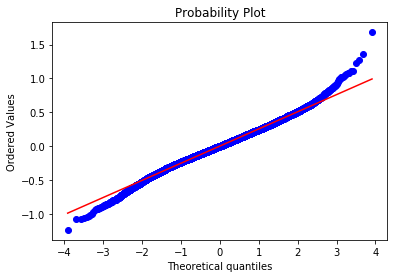

In [17]:
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(error_val_list, dist="norm", plot=pylab)
pylab.show()

dsadsada la wea bonita

selected = grade ...
totalvars=2, mse = 0.143260
0.143260330792 0.13220485104040286
selected = lat ...
totalvars=3, mse = 0.103340
0.103340215062 0.09791248114306247
selected = yr_built ...
totalvars=4, mse = 0.093145
0.0931448234237 0.09033109086740101
selected = bathrooms ...
totalvars=5, mse = 0.081737
0.0817374901319 0.07920318876161692
selected = sqft_living15 ...
totalvars=6, mse = 0.074692
0.0746915133018 0.0737564055277325
selected = view ...
totalvars=7, mse = 0.071336
0.0713360865193 0.07000769446289934
selected = condition ...
totalvars=8, mse = 0.069809
0.069808881231 0.0691402194827636
selected = sqft_above ...
totalvars=9, mse = 0.068097
0.0680971625775 0.06652874275250376
selected = sqft_basement ...
totalvars=10, mse = 0.066743
0.0667426827576 0.06420958367694207
selected = waterfront ...
totalvars=11, mse = 0.065743
0.0657432301696 0.0633294769741087
selected = floors ...
totalvars=12, mse = 0.065095
0.0650954272931 0.06281731538959869
selected = sqft_lot ...
totalvars

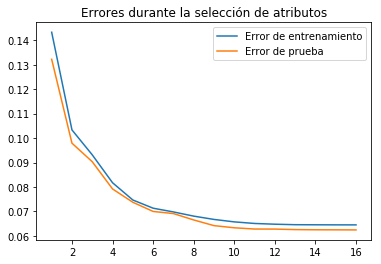

In [40]:
def fss(x, y, xtest, ytest, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    mse_curr_list=[]
    mse_test_list=[]
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
        model = lm.LinearRegression(fit_intercept=False)
        x_curr = x[:, selected]
        predictions_curr = model.fit(x_curr, y).predict(x_curr)
        mse_curr = np.mean(np.power(predictions_curr - y, 2))
        x_test = xtest[:, selected]
        model = lm.LinearRegression(fit_intercept=False)
        predictions_test = model.fit(x_test, ytest).predict(x_test)
        mse_test = np.mean(np.power(predictions_test - ytest, 2))
        print(mse_curr, mse_test)
        mse_curr_list.append(mse_curr)
        mse_test_list.append(mse_test)
    
    return (selected, mse_curr_list, mse_test_list)
names_regressors = X.columns[:-1] #without intercept
Xtestm = Xtest.as_matrix()
(selected, error_train ,error_test)=fss(Xm,ym,Xtestm,ytest,names_regressors)

%matplotlib inline 
x = np.linspace(1, 16, 16)
trainplot, =plt.plot(x, error_train,label="Error de entrenamiento")
testplot, =plt.plot(x, error_test,label="Error de prueba")
plt.legend(handles=[trainplot, testplot])
plt.title('Errores durante la selección de atributos')
plt.show()


3 A

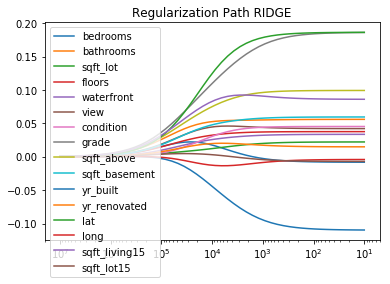

In [41]:

X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

3 B

In [ ]:

X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path Lasso')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

3 C

In [ ]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

In [ ]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

(e) Estime el valor del par´ametro de regularizaci´on en alguno de los modelos anteriores haciendo uso de
la t´ecnica validaci´on cruzada.

In [ ]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_ = np.logspace(7,1,base=10)
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print ("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

In [ ]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_ = np.logspace(0,-3,base=10)
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print ("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

4

In [ ]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

4 A

In [ ]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)